---
title: 7.1 Complex Eigenvalues and Linear Dynamical Systems
subject: Dynamics
subtitle: Euler breaks down complex exponentials
short_title: 7.1 Complex Eigenvalues and Linear Dynamical Systems
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: complex eigenvalues, complex conjugates, euler's formula, real eigensolutions
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/06_Ch_7_Dynamics/081-complex_eig_LDS.ipynb)

{doc}`Lecture notes <../lecture_notes/Lecture 13 - Complex and Repeated Eigenvalues Revisited, Jordan Blocks, Matrix Exponential.pdf>`

## Reading

Material related to this page, as well as additional exercises, can be found in ALA 10.1 and 10.3.

## Learning Objectives

By the end of this page, you should know:
- how to use Euler's formula,
- how to write real solutions to linear dynamical systems that have complex eigenvalues.

# Solving Linear ODEs with Complex Eigenvalues

In the previous section on linear ODEs, we learned how to find the solutions when the coefficient matrix $A$ was diagonalizable. We also saw some examples when $A$ was diagonalizable and had all real eigenvalues. It turns out that the same procedure generalizes when $A$ is diagonalizable, but has complex eigenvalues. On this page, we'll see how this can be done. 

Let's apply our [solution method for diagonalizable $A$](#odes-thm1) to $\dot{\vv x} = A \vv x$ with $A = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$. We are given that $A$ has eigenvalue/eigenvector pairs:

\begin{equation}
\label{eig_vals}
\lambda_1 = i, \ \vv v_1 = \begin{bmatrix} 1 \\ -i \end{bmatrix} \quad \text{and} \quad \lambda_2 = -i, \vv v_2 = \begin{bmatrix} 1 \\ i \end{bmatrix}.
\end{equation}

Even though these eigenvalues/vectors have complex entries, we can still use our solution method for diagonalizable $A$! We write the solution to $\dot{\vv x} = A\vv x$ as

\begin{equation}
\label{sol}
\vv x(t) = c_1e^{\lambda_1 t}\vv v_1 + c_2e^{\lambda_2t}\vv v_2 = c_1e^{it}\begin{bmatrix} 1 \\ -i \end{bmatrix} + c_2e^{-it}\begin{bmatrix} 1 \\ i \end{bmatrix}, \quad (\text{SOL})
\end{equation}

i.e., $\vv x(t)$ is a linear combination of the two solutions

\begin{equation}
\label{base}
\vv x_1(t) = c_1e^{it}\begin{bmatrix} 1 \\ -i \end{bmatrix} \quad \text{and} \quad \vv x_2(t) = c_2e^{-it}\begin{bmatrix} 1 \\ i \end{bmatrix}. \quad (\text{BASE})
\end{equation}

and then solve for $c_1$ and $c_2$ to ensure compatibility with the initial condition $\vv x(0)$. In general $c_1$ and $c_2$ will also be complex numbers, and $\vv x(t)$ will take complex values. This is mathematically correct, and indeed one can study dynamical systems evolving over complex numbers. However, we will see that with a little massaging, we can rewrite this solution in a more useful form!

## Rewriting the Solution to a Linear ODE

In this class, and in most engineering applications, we are interested in _real solutions to $\dot{\vv x} = A\vv x$_. If we know want real solutions, it might make sense to try to find different "base" solutions than $\vv x_1(t)$ and $\vv x_2(t)$ that still span all possible solutions to $\dot{\vv x} = A\vv x$. Our key tool for accomplishing this is [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula):

:::{prf:theorem} Euler's Formula 
:label: euler-formula-thm

For any $t \in \mathbb{R}$, $e^{it} = \cos t + i \sin t$.
:::

We apply Euler's formula to ([BASE](#base)), and obtain (after simplifying):

\begin{align*}
\vv x_1(t) = e^{it}\begin{bmatrix} 1 \\ -i \end{bmatrix} = \begin{bmatrix} \cos t \\ \sin t \end{bmatrix} + i\begin{bmatrix} \sin t \\ -\cos t \end{bmatrix},
\vv x_2(t) = e^{-it}\begin{bmatrix} 1 \\ i \end{bmatrix} = \begin{bmatrix} \cos t \\ \sin t \end{bmatrix} - i\begin{bmatrix} \sin t \\ -\cos t \end{bmatrix}.
\end{align*}

We've made some progress, in that $\vv x_1(t)$ and $\vv x_2(t)$ are now in the "standard" complex number form $a+ib$, and that $\vv x_1(t) = \overline{\vv x_2}(t)$, i.e., $\vv{x_1}(t)$ and $\vv{x_2}(t)$ are complex conjugates. We use this observation strategically to define two new "base" solutions:

\begin{equation}
\label{real_eqn}
\hat{\vv x}_1(t) &= \frac{1}{2}(\vv x_1(t) + \vv x_2(t)) = \frac{1}{2}(\vv x_1(t) + \overline{\vv x_1}(t)) \\
&= \begin{bmatrix} \cos t \\ \sin t \end{bmatrix} (= \text{Re}\{\vv x_1(t)\})
\end{equation}

\begin{equation}
\label{im_eqn}
\hat{\vv x}_2(t) &= \frac{1}{2i}(\vv x_1(t) - \vv x_2(t)) = \frac{1}{2i}(\vv x_1(t) - \overline{\vv x_1}(t)) \\
&= \begin{bmatrix} \sin t \\ -\cos t \end{bmatrix} (= \text{Im}\{\vv x_1(t)\})
\end{equation}

We note that since $\hat{\vv x}_1(t)$ and $\hat{\vv x}_2(t)$ are linear combinations of $\vv x_1(t)$ and $\vv x_2(t)$, they are valid solutions to $\dot{\vv x} = A\vv x$. Furthermore, since $\hat{\vv x}_1(t)$ and $\hat{\vv x}_2(t)$ are linearly independent (i.e., $c_1\hat{\vv x}_1(t) + c_2\hat{\vv x}_2(t) = 0$ for all $t$ if and only if $c_1 = c_2 = 0$), they form a basis for the solution set to $\dot{\vv x} = A \vv x$. Therefore, we can rewrite ([SOL](#sol)) as

$$
\vv x(t) = c_1\begin{bmatrix} \cos t \\ \sin t \end{bmatrix} + c_2\begin{bmatrix} \sin t \\ -\cos t \end{bmatrix}
$$

and then solve for $c_1$ and $c_2$ using $\vv x(0)$. If $\vv x(0) \in \mathbb{R}^2$, i.e., if the initial condition $\vv x(0)$ is real, then $c_1$ and $c_2$ will be too. For example, suppose $\vv x(0) = \begin{bmatrix} a \\ b \end{bmatrix}$, with $a,b \in \mathbb{R}$. Then:

$$
\vv x(0) = c_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + c_2\begin{bmatrix} 0 \\ -1 \end{bmatrix} = \begin{bmatrix} c_1 \\ -c_2 \end{bmatrix} = \begin{bmatrix} a \\ b \end{bmatrix} \Rightarrow c_1 = a, c_2 = -b,
$$

and 
$$
\vv x(t) = \begin{bmatrix} a\cos t - b\sin t \\ a\sin t + b\cos t \end{bmatrix} = \begin{bmatrix} \cos t & -\sin t \\ \sin t & \cos t \end{bmatrix}\begin{bmatrix} a \\ b \end{bmatrix} = R(t) \vv x(0),
$$

i.e., the solution $\vv x(t)$ corresponds to the initial condition $\vv x(0)$ being **rotated** in a counterclockwise direction at a frequency of 1 rad/s.


:::{note}
The key steps in the above procedure were:

1. Apply Euler's formula to rewrite the base solutions as
   $$
   \vv x_1(t) = \text{Re}\{\vv x_1(t)\} + i\text{Im}\{\vv x_1(t)\}, x_2(t) = \overline{\vv x_1}(t) = \text{Re}\{\vv x_1(t)\} - i\text{Im}\{\vv x_1(t)\}
   $$

2. Define new basic solutions by setting:
   $$
   \hat{\vv x}_1(t) = \text{Re}\{\vv x_1(t)\} \ \text{and} \ \hat{\vv x}_2(t) = \text{Im}\{\vv x_2(t)\}
   $$
It turns out that this approach is completely general, and can be applied whenever you encounter complex eigenvalue/vectors (which always appear as complex conjugate pairs).
:::


:::{prf:example}
:label: eg_1
Consider the linear dynamical system $\dot{\vv x} = A \vv x$, where

$$A = \begin{bmatrix} 1 & 2 & 0 \\ 0 & 1 & -2 \\ 2 & 2 & -1 \end{bmatrix} \quad \text{and} \quad \vv x(0) = \begin{bmatrix} 2 \\ -1 \\ -2 \end{bmatrix}.
$$

Using the formula for the determinant of a 3x3 matrix (you don't need to memorize this!), we can compute the following eigenvalue/vector pairs:

$$
\begin{aligned}
\lambda_1 &= -1, & \lambda_2 &= 1 + 2i, &  \lambda_3 &= 1 - 2i \\
\vv v_1 &= \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix}, & \vv v_2 &= \begin{bmatrix} 1 \\ i \\ 1 \end{bmatrix}, & \vv v_3 &= \begin{bmatrix} 1 \\ -i \\ 1 \end{bmatrix}
\end{aligned}
$$

and obtain the corresponding eigensolutions:

$$
\vv x_1(t) = e^{-t}\begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix}, \quad \vv x_2(t) = e^{(1+2i)t}\begin{bmatrix} 1 \\ i \\ 1 \end{bmatrix}, \quad \vv x_3(t) = e^{(1-2i)t}\begin{bmatrix} 1 \\ -i \\ 1 \end{bmatrix}.
$$

Let's apply Euler's formula to $\vv x_2(t)$ (remember that $e^{(1+2i)t} = e^t e^{i(2t)}$):

$$
\vv x_2(t) &= e^{(1+2i)t}\begin{bmatrix} 1 \\ i \\ 1 \end{bmatrix} = e^t(\cos 2t + i\sin 2t)\begin{bmatrix} 1 \\ i \\ 1 \end{bmatrix} 
&= \begin{bmatrix} e^t\cos 2t \\ -e^t\sin 2t \\ e^t\cos 2t \end{bmatrix} + i\begin{bmatrix} e^t\sin 2t \\ e^t\cos 2t \\ e^t\sin 2t \end{bmatrix}.
$$

This means another set of real eigensolutions to $\dot{\vv x} = A\vv x$ is

$$
\vv x_1(t) = e^{-t}\begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix}, \quad \hat{\vv x}_2(t) &= \text{Re}\{\vv x_2(t)\} &= e^t\begin{bmatrix} \cos 2t \\ -\sin 2t \\ \cos 2t \end{bmatrix}, \\
\hat{\vv x}_3(t) &= \text{Im}\{\vv x_2(t)\} &= e^t\begin{bmatrix} \sin 2t \\ \cos 2t \\ \sin 2t \end{bmatrix},
$$

and a general solution can be written as

$$
\vv x(t) = c_1\vv x_1(t) + c_2\hat{\vv x}_2(t) + c_3\hat{\vv x}_3(t) = \begin{bmatrix} -c_1e^{-t} + c_2e^t\cos 2t + c_3e^t\sin 2t \\ c_1e^{-t} - c_2e^t\sin 2t + c_3e^t\cos 2t \\ c_1e^{-t} + c_2e^t\cos 2t + c_3e^t\sin 2t \end{bmatrix}
$$

We compute our constants $c_1, c_2, c_3$ by solving
$$
\mathbf{x}(0) = \begin{bmatrix}
-c_1 + c_2 \\
c_1 + c_3 \\
c_1 + c_2
\end{bmatrix} = \begin{bmatrix}
2 \\
-1 \\
-2
\end{bmatrix} \Rightarrow c_1 = -2, \quad c_2 = 0, \quad c_3 = 1
$$

thus obtaining the specific solution to our original initial value problem as:
$$
\mathbf{x}(t) = \begin{bmatrix}
x_1(t) \\
x_2(t) \\
x_3(t)
\end{bmatrix} = \begin{bmatrix}
2e^{-t} + e^t\sin 2t \\
-2e^{-t} + e^t\cos 2t \\
-2e^{-t} + e^t\sin 2t
\end{bmatrix}.
$$

#### Python break!

In the below code, we illustrate how to numerically integrate an ordinary differential equation using [SciPy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) in Python. We then compare it with the manual solution we obtained in [](#eg_1).

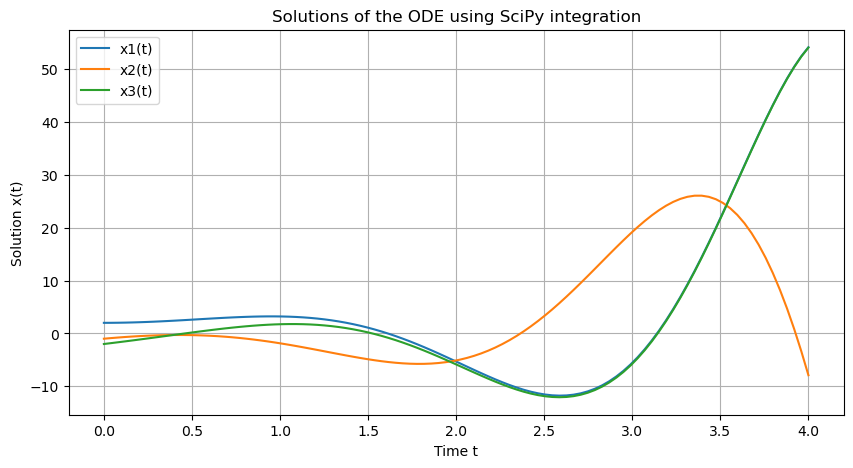

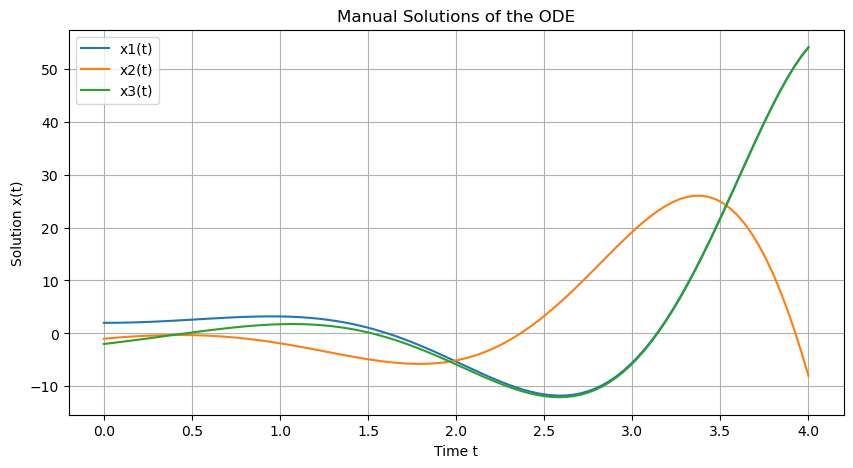

In [91]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A = np.array([[1, 2, 0],
          [0, 1, -2],
          [2, 2, -1]])

def system(t, x):
    return A @ x
    
x0 = np.array([2, -1, -2])

# Define time points for the solution
t_span = (0, 4)  # Time from 0 to 10
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Time points where the solution is evaluated

# Solve the ODE system
sol = solve_ivp(system, t_span, x0, t_eval=t_eval)

# Extract the solution
times = sol.t
solutions = sol.y

# Plot the solutions
plt.figure(figsize=(10, 5))
plt.plot(times, solutions[0, :], label='x1(t)')
plt.plot(times, solutions[1, :], label='x2(t)')
plt.plot(times, solutions[2, :], label='x3(t)')
plt.xlabel('Time t')
plt.ylabel('Solution x(t)')
plt.title('Solutions of the ODE using SciPy integration')
plt.legend()
plt.grid()
plt.show()

## Manual solution from example 1

solutions_manual = np.vstack((2*np.exp(-times)+np.exp(times)*np.sin(2*times),
                             -2*np.exp(-times)+np.exp(times)*np.cos(2*times),
                              -2*np.exp(-times)+np.exp(times)*np.sin(2*times),))

# Plot the solutions
plt.figure(figsize=(10, 5))
plt.plot(times, solutions_manual[0, :], label='x1(t)')
plt.plot(times, solutions_manual[1, :], label='x2(t)')
plt.plot(times, solutions_manual[2, :], label='x3(t)')
plt.xlabel('Time t')
plt.ylabel('Solution x(t)')
plt.title('Manual Solutions of the ODE')
plt.legend()
plt.grid()
plt.show()

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/06_Ch_7_Dynamics/081-complex_eig_LDS.ipynb)